Exploratory Data Analysis (EDA)
1. Data Loading and Inspection

Dataset Selection
We use the SMS Spam Collection dataset from UCI.
It has SMS messages labeled as ham (not spam) or spam.



In [10]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Anchita Lokhande\Downloads\sms+spam+collection\SMSSpamCollection", sep='\t', header=None, names=['Label', 'Message'])
print(df.head())


  Label                                            Message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


2. Data Summary
Load and Inspect Data
Load the dataset using Pandas.
Check the structure with .head(), .info(), and .isnull() to identify any issues like missing data.

In [11]:
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None
Label      0
Message    0
dtype: int64


3. Class Distribution
Exploratory Data Analysis (EDA)
Class balance check: How many ham vs. spam messages?
Message length analysis: Spam messages are often longer or more structured.
Visualizations: Use bar charts and histograms to understand distributions.

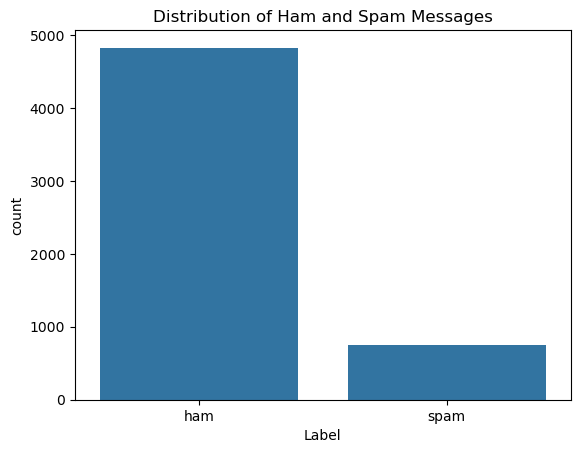

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Label', data=df)
plt.title('Distribution of Ham and Spam Messages')
plt.show()


Data Preprocessing
Text Cleaning
 Message Length Analysis
Text Preprocessing
Clean messages by:
Removing punctuation.
Removing stopwords (e.g., "the", "is", "and").
This helps focus on the meaningful content of the messages.

In [13]:
import string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

def text_process(msg):
    # Remove punctuation
    no_punc = [char for char in msg if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    
    # Remove stopwords
    return [word for word in no_punc.split() if word.lower() not in stopwords.words('english')]

# Apply the function
df['Cleaned_Message'] = df['Message'].apply(text_process)


[nltk_data] Downloading package stopwords to C:\Users\Anchita
[nltk_data]     Lokhande\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


2 .Vectorization
Text Vectorization
Convert cleaned messages into a numeric format using CountVectorizer.
This builds a matrix of word frequencies for the model to learn from.




In [14]:
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate the vectorizer
vectorizer = CountVectorizer(analyzer=text_process)

# Fit and transform the data
X = vectorizer.fit_transform(df['Message'])


3. Label Encoding
Convert labels from text (ham, spam) to numbers (0, 1) so the model can understand them.

In [15]:
from sklearn.preprocessing import LabelEncoder

# Encode labels: ham -> 0, spam -> 1
encoder = LabelEncoder()
y = encoder.fit_transform(df['Label'])


4. Train-Test Split
Split the data into training (80%) and testing (20%) sets.
This allows us to train the model and then evaluate it on unseen data.




In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model Building with Naive Bayes
1. Training the Model
Predict spam/ham on the test set.
Evaluate the model using:
Accuracy (overall correct predictions),
Precision, Recall, F1-score (for each class),
Confusion matrix (visualize prediction errors).



In [17]:
from sklearn.naive_bayes import MultinomialNB

# Instantiate the model
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train, y_train)


MultinomialNB()

2. Making Predictions



In [21]:
# Predict on the test set
y_pred = nb_model.predict(X_test)


Model Evaluation

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

# Classification Report
print(classification_report(y_test, y_pred))

# Accuracy Score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


[[942  24]
 [ 12 137]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       966
           1       0.85      0.92      0.88       149

    accuracy                           0.97      1115
   macro avg       0.92      0.95      0.93      1115
weighted avg       0.97      0.97      0.97      1115

Accuracy: 0.967713004484305


Visualization
Plot a heatmap of the confusion matrix.
Helps to understand where the model makes mistakes (e.g., misclassifying spam as ham).


1. Confusion Matrix Heatmap


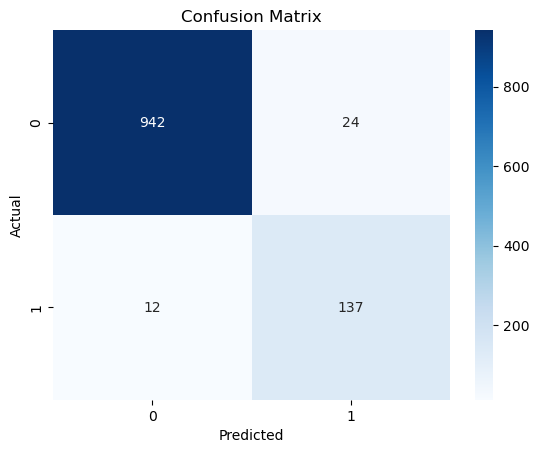

In [23]:
import seaborn as sns

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


he BayesMind project successfully demonstrates the application of the 
Naive Bayes algorithm for SMS spam detection. Through comprehensive EDA,
meticulous preprocessing, and robust model evaluation, 
we've built a classifier capable of distinguishing between spam and legitimate messages with high accuracy.